/tmp/ipykernel_6187/3192040404.py:34: RuntimeWarning: invalid value encountered in divide
  speedX = momentumX / density
/tmp/ipykernel_6187/3192040404.py:35: RuntimeWarning: invalid value encountered in divide
  speedY = momentumY / density


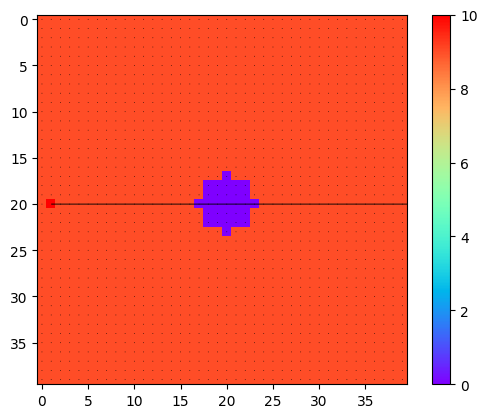

In [618]:
import numpy as np
import matplotlib.pyplot as plt
import itertools as itr
from boundaries import WallBoundary, PressureBoundary

# Initializing a rank three tensor filled with nodes
latticeSize = 9
xResolution = 40
yResolution = 40
relaxationTime = 0.809
# Weights
unitVect = np.array(
    [[0, 0], [1, 0], [0, 1], [-1, 0], [0, -1], [1, 1], [-1, 1], [-1, -1], [1, -1]]
)
unitX = np.array([0, 1, 0, -1, 0, 1, -1, -1, 1])
unitY = np.array([0, 0, 1, 0, -1, 1, 1, -1, -1])
weight = np.array([4 / 9, 1 / 9, 1 / 9, 1 / 9, 1 / 9, 1 / 36, 1 / 36, 1 / 36, 1 / 36])
cs = np.sqrt(3)

# Initializing the fluid matrix
fluid = np.ones(
    (xResolution, yResolution, latticeSize)
)  # + 0.1 * np.random.randn(xResolution, yResolution, latticeSize)
fluid[20, 1, 1] = 2
iteratedFluid = fluid.copy()

boundary = WallBoundary(xResolution, yResolution, False)
boundary.cylindricalWall([xResolution / 2, yResolution / 2], 3)
fluid[boundary.boundary, :] = 0

density = np.sum(fluid, axis=2)
momentumX = np.sum(fluid * unitX, axis=2)
momentumY = np.sum(fluid * unitY, axis=2)
speedX = momentumX / density
speedY = momentumY / density
speedX = np.nan_to_num(speedX, posinf=0, neginf=0, nan=0)
speedY = np.nan_to_num(speedY, posinf=0, neginf=0, nan=0)

X = np.arange(xResolution)
Y = np.arange(yResolution)

plt.quiver(X, Y, speedX, speedY)
plt.imshow(density, cmap="rainbow", interpolation="nearest")
plt.colorbar()
# plt.imshow(boundary.boundary, cmap = "gray", interpolation = "nearest")

In [619]:
def stepFluid(fluid):
    # Stabilizing Step
    density = np.sum(fluid, axis=2)
    speedX = np.sum(fluid * unitX, axis=2) / density
    speedY = np.sum(fluid * unitY, axis=2) / density
    speedX = np.nan_to_num(speedX, posinf=0, neginf=0, nan=0)
    speedY = np.nan_to_num(speedY, posinf=0, neginf=0, nan=0)

    # Equilizing step
    fluidEquilibrium = np.zeros(fluid.shape)
    for latticeIndex, cx, cy, w in zip(range(latticeSize), unitX, unitY, weight):
        fluidEquilibrium[:, :, latticeIndex] = (
            density
            * w
            * (
                1
                + 3 * (cx * speedX + cy * speedY)
                + 9 * (cx * speedX + cy * speedY) ** 2 / 2
                - 3 * (speedX**2 + speedY**2) / 2
            )
        )

    fluid += -(1 / relaxationTime) * (fluid - fluidEquilibrium)

    for latticeIndex, shiftX, shiftY in zip(range(latticeSize), unitX, unitY):
        fluid[:, :, latticeIndex] = np.roll(fluid[:, :, latticeIndex], shiftX, axis=1)
        fluid[:, :, latticeIndex] = np.roll(fluid[:, :, latticeIndex], shiftY, axis=0)

    fluidBoundary = fluid[boundary.boundary, :]
    fluidBoundary = fluidBoundary[:, [0, 3, 4, 1, 2, 7, 8, 5, 6]]
    fluid[boundary.boundary, :] = fluidBoundary
    # for y, xList in enumerate(fluidBoundary):
    #     for x, isAWall in enumerate(xList):
    #         if isAWall:
    #             for latticeIndex in range(latticeSize):
    #                 if latticeIndex in [3, 4, 7, 8]:
    #                     reflectIndex = latticeIndex - 2
    #                 else:
    #                     reflectIndex = latticeIndex + 2
    #                 fluid[
    #                     x - unitX[latticeIndex],
    #                     y - unitY[latticeIndex],
    #                     reflectIndex,
    #                 ] += fluid[x, y, latticeIndex]
    #                 fluid[x, y, latticeIndex] = 0

    return fluid

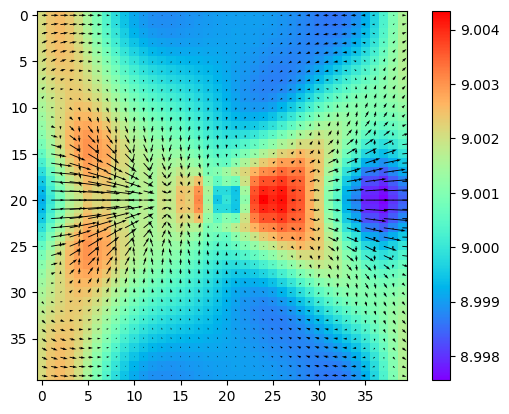

In [696]:
iteratedFluid = stepFluid(iteratedFluid)
iteratedDensity = np.sum(iteratedFluid, axis = 2)
iteratedMomentumX = np.sum(iteratedFluid * unitX, axis = 2)
iteratedMomentumY = np.sum(iteratedFluid * unitY, axis = 2) 
# iteratedDensity[boundary.boundary] = 0
iteratedMomentumX[boundary.boundary] = 0
iteratedMomentumY[boundary.boundary] = 0
plt.quiver(X, Y, iteratedMomentumX, iteratedMomentumY)
plt.imshow(iteratedDensity, cmap = "rainbow", interpolation = "nearest")
plt.colorbar()

In [621]:
iteratedFluid, momentumOut = step(iteratedFluid)
X = np.arange(xResolution)
Y = np.arange(yResolution)
#print(list(momentumOut))
plt.quiver(X, Y, momentumOut[:,:,0], momentumOut[:,:,1])

NameError: name 'step' is not defined

In [12]:
a = np.array([1]) / np.array([0])
np.nan_to_num(a, posinf = 0, neginf = 0, nan = 0)

/tmp/ipykernel_6187/568817475.py:1: RuntimeWarning: divide by zero encountered in divide
  a = np.array([1]) / np.array([0])


array([0.])